# MPHY0041 - CW1 - Notebook

In [1]:
#import several libraries
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit
from sklearn.linear_model import LinearRegression

## Exercise 1: Decision Boundaries

## a)

 Amyloid Mean for CN group: 1.1178
 Amyloid Mean for Dementia group: 1.4030
 Amyloid Shared Standard deviation 0.2316
Decision Boundary at x = 1.2604


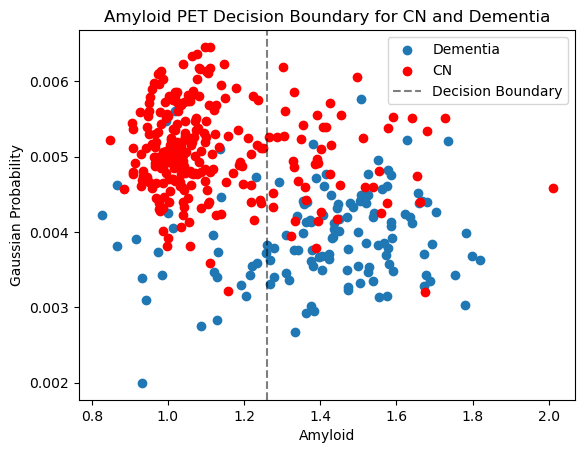

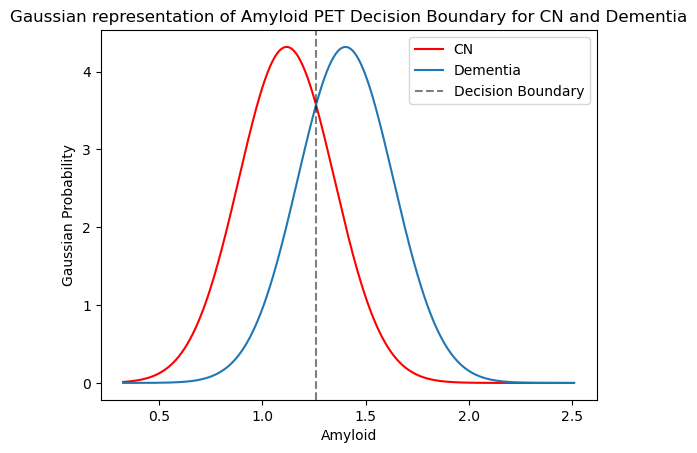

In [11]:
#Functions

def gaussian_prob(x,mean,std,prob):
    """Calculates Gaussian Probability Distribution Based on the input values ,
    mean,
    Standard Deviation:std
    Prior probability: prob
    """
    return (1/(std*np.sqrt(2*prob)))*np.exp(-0.5*(((x-mean)/std)**2))

def Convert_Classification(Dataset):
    """Converts the different classes (CN,Dementia,MCI) to an integer type
    classification where CN:0 , Dementia:1 , MCI:2"""
    
    #Create the representative encoding for the classes in the form of a vector
    encoding = pd.Series([0] * Dataset.shape[0]) #initialize all as 0 
    encoding[Dataset.DX=='Dementia'] = 1 #set 1 for Dementia
    encoding[Dataset.DX =='MCI'] = 2 # set 2 for MCI
    #Add to dataframe
    Dataset.insert(1, 'Class_ID', encoding)
    return (Dataset)

#Loading the dataset assuming the file is located in the same folder 
Dataset = pd.read_csv('AD_CW1.csv')
Dataset = Convert_Classification(Dataset)


#Dropping the MCI rows
Dataset_NOMCI = Dataset.loc[Dataset['DX'] != 'MCI']  

#Calculating Mean and Standard Deviation for CN and Dementia (Amyloid Only) 
Mean_CN_AM = Dataset[Dataset['DX'] == "CN"]["Amyloid"].mean()
std_CN_AM = Dataset[Dataset['DX'] == "CN"]["Amyloid"].std()
Mean_Dem_AM = Dataset[Dataset['DX'] == "Dementia"]["Amyloid"].mean()
std_Dem_AM = Dataset[Dataset['DX'] == "Dementia"]["Amyloid"].std()
Shared_std_AM = Dataset["Amyloid"].std()

                  
print(f' Amyloid Mean for CN group: {Mean_CN_AM:.4f}')
print(f' Amyloid Mean for Dementia group: {Mean_Dem_AM:.4f}')
print(f' Amyloid Shared Standard deviation {Shared_std_AM:.4f}')

#Splitting into 2 datasets (only for plotting)
Dem_df = Dataset[Dataset['DX']== "Dementia"]
CN_df = Dataset[Dataset['DX']== "CN"]
MCI_df = Dataset[Dataset['DX']== "MCI"] #Used in C)

#Plotting the points 
plt.scatter(Dem_df["Amyloid"], Dem_df["HV_ratio"],label="Dementia")
plt.scatter(CN_df["Amyloid"], CN_df["HV_ratio"], c= "red", label="CN")
#plt.show()

# Calculate the variances of each group
group1_var = np.var(Dem_df["Amyloid"], ddof=1)
group2_var = np.var(CN_df["Amyloid"], ddof=1)
# Calculate the shared variance
shared_var = ((len(Dem_df["Amyloid"])-1)*group1_var + (len(CN_df["Amyloid"])-1)*group2_var) / (len(Dem_df["Amyloid"]) + len(CN_df["Amyloid"]) - 2)
#Calculate Shared Standard Deviation
shared_std = np.sqrt(shared_var)


#Explanation for this formula is provided on the markdown below
boundary = (Mean_CN_AM + Mean_Dem_AM)/2    # + shared_std ** 4 / (Mean_AD_AM - Mean_CN_AM) * np.log(1)
print(f'Decision Boundary at x = {boundary:.4f}')
plt.axvline(x=boundary,ls='--',c = 'black', alpha=0.5, label = "Decision Boundary")
plt.title("Amyloid PET Decision Boundary for CN and Dementia")
plt.xlabel("Amyloid")
plt.ylabel("Gaussian Probability")
plt.legend();
plt.show()

# Calculating the Gaussians 
x_min = Dataset_NOMCI['Amyloid'].min() -0.5
x_max = Dataset_NOMCI['Amyloid'].max()+0.5
p1 = 0.5
p2 = 0.5
x=np.linspace(x_min,x_max,1000) #creating an array of points
Gaussian_CN = gaussian_prob(x, Mean_CN_AM,Shared_std_AM,p1) 
Gaussian_Dem = gaussian_prob(x, Mean_Dem_AM,Shared_std_AM,p2)

#Plotting the Gaussians
plt.plot(x,Gaussian_CN, c = 'red',label="CN")
plt.plot(x,Gaussian_Dem,label="Dementia")
plt.axvline(x=boundary,ls='--',c = 'black', alpha=0.5, label = "Decision Boundary")
plt.title("Gaussian representation of Amyloid PET Decision Boundary for CN and Dementia")
plt.legend();
plt.xlabel("Amyloid")
plt.ylabel("Gaussian Probability")
plt.show()



# ADD COMMENTS FOR DECISION MAKING

## b)

The coefficients are: 0.6961619904581088 and -308.8574806245222
The intercept is: 0.940537103223881


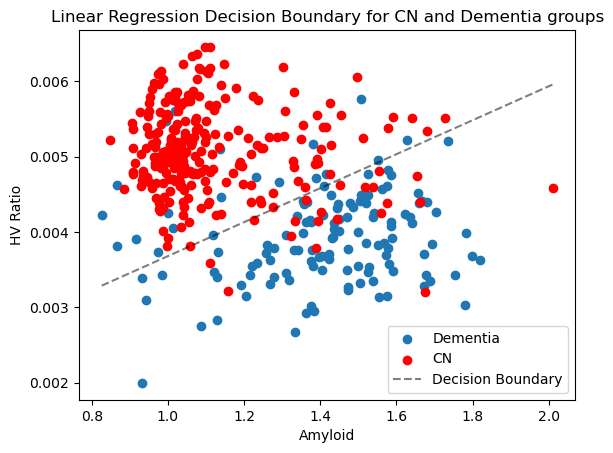

In [10]:
# split the dataset into input (X) and output (y) variables
X=Dataset_NOMCI.loc[:,'Amyloid':'HV_ratio']
y=Dataset_NOMCI.Class_ID

#Split the data into train and testing in order to be able to test the accuracy of our model after training 

#Set-up the model
model =LinearRegression()
#Training the model 
model.fit(X, y)

#Getting intercept and coefficients 
b1,b2 = model.coef_  #coefficients
b0 = model.intercept_ #intercept
print("The coefficients are:",b1,"and",b2)
print("The intercept is:",b0)

#Calculating Decision Boundary for Linear Regression
x_min = Dataset_NOMCI['Amyloid'].min()
x_max = Dataset_NOMCI['Amyloid'].max()
x=np.linspace(x_min,x_max,1000) #creating an array of points 
x_boundary = (-b0-x*b1+0.5)/b2

#plotting the points first
plt.figure()
plt.scatter(Dem_df["Amyloid"], Dem_df["HV_ratio"],label="Dementia")
plt.scatter(CN_df["Amyloid"], CN_df["HV_ratio"], c= "red", label="CN")

#Plotting the line 
plt.plot(x,x_boundary,'--',c = "black", alpha = 0.5, label="Decision Boundary")
plt.title("Linear Regression Decision Boundary for CN and Dementia groups")
plt.legend(loc='lower right')
plt.xlabel("Amyloid")
plt.ylabel("HV Ratio")
plt.show()

## c)

In [5]:
#Calculating the means ( We already have calculated the means for CN and Dementia before)
#first the three missing HV_ratio means
Mean_CN_HV=Dataset['HV_ratio'].loc[Dataset['DX'] == 'CN'].mean()
Mean_Dem_HV=Dataset['HV_ratio'].loc[Dataset['DX'] == 'Dementia'].mean()
Mean_MCI_HV=Dataset['HV_ratio'].loc[Dataset['DX'] == 'MCI'].mean()
#The missing Amyloid mean for MCI
Mean_MCI_AM=Dataset['Amyloid'].loc[Dataset['DX'] == 'MCI'].mean()

#Combining the means for each Class into one array
Means_CN = np.array([Mean_CN_AM, Mean_CN_HV])
Means_Dem = np.array([Mean_Dem_AM, Mean_Dem_HV])
Means_MCI = np.array([Mean_MCI_AM, Mean_MCI_HV])

#Reshaping into [2x1] vectors
Means_CN=Means_CN.reshape((len(Means_CN),1))
Means_Dem=Means_Dem.reshape((len(Means_Dem),1))
Means_MCI=Means_MCI.reshape((len(Means_MCI),1))

#Using .cov() function to calculate covariance
cov_matrix =Dataset.loc[:,'Amyloid':'HV_ratio'].cov() 

#printing the values 
print("Covariance:\n",cov_matrix)
print("\n")
print("CN Means: \n", Means_CN)
print("\n")
print("Dementia Means: \n", Means_Dem)
print("\n")
print("MCI Means: \n", Means_MCI)



Covariance:
            Amyloid      HV_ratio
Amyloid   0.053644 -6.559072e-05
HV_ratio -0.000066  6.419187e-07


CN Means: 
 [[1.11781787]
 [0.0050811 ]]


Dementia Means: 
 [[1.40300458]
 [0.00394085]]


MCI Means: 
 [[1.21843374]
 [0.00471236]]


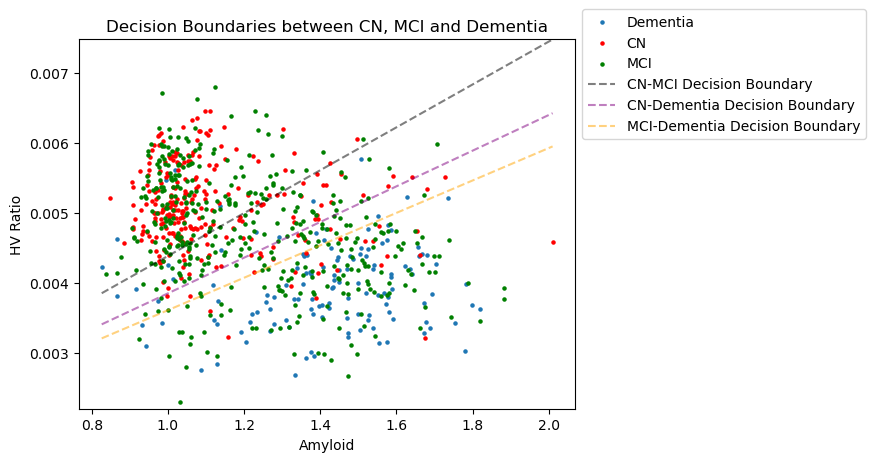

In [22]:
#Calculating beta coefficients and boundaries
x_min = Dataset['Amyloid'].min()
x_max = Dataset['Amyloid'].max()
x = np.linspace(x_min, x_max,1000)
cov_matrix_inv = np.linalg.inv(cov_matrix)

#CN-MCI
b0 =(-0.5*(Means_CN-Means_MCI).T@cov_matrix_inv@(Means_CN+Means_MCI)).reshape(1)
b1,b2 = cov_matrix_inv@(Means_CN-Means_MCI)
CN_MCI_Bound  = (-b0-x*b1)/b2

#CN-Dementia 
b0 =(-0.5*(Means_CN-Means_Dem).T@cov_matrix_inv@(Means_CN+Means_Dem)).reshape(1)
b1,b2 = cov_matrix_inv@(Means_CN-Means_Dem)
CN_Dem_Bound  = (-b0-x*b1)/b2

#MCI-Dementia 
b0 =(-0.5*(Means_MCI-Means_Dem).T@cov_matrix_inv@(Means_MCI+Means_Dem)).reshape(1)
b1,b2 = cov_matrix_inv@(Means_MCI-Means_Dem)
MCI_Dem_Bound  = (-b0-x*b1)/b2

#Plotting 
plt.figure()
#Datapoints
plt.scatter(Dem_df["Amyloid"], Dem_df["HV_ratio"],label="Dementia",s = 5)
plt.scatter(CN_df["Amyloid"], CN_df["HV_ratio"], c= "red", label="CN", s =5)
plt.scatter(MCI_df["Amyloid"], MCI_df["HV_ratio"], c= "green", label="MCI",s=5)

#Boundary Lines 
plt.plot(x,CN_MCI_Bound,'--',c = "black", alpha = 0.5, label="CN-MCI Decision Boundary", lw =1.5)
plt.plot(x,CN_Dem_Bound,'--',c = "purple", alpha = 0.5, label="CN-Dementia Decision Boundary",lw=1.5)
plt.plot(x,MCI_Dem_Bound,'--',c = "orange", alpha = 0.5, label="MCI-Dementia Decision Boundary", lw=1.5)

y_min = Dataset['HV_ratio'].min()*(1.1)
y_max = Dataset['HV_ratio'].max()*(1.1)
plt.ylim(y_min,y_max)
plt.legend(bbox_to_anchor=(1, 1.1), loc='upper left');
plt.title("Decision Boundaries between CN, MCI and Dementia")
plt.xlabel("Amyloid")
plt.ylabel("HV Ratio")
plt.show()





## Exercise 2: Classifier Implementations

### a) Complete the code for Rosenblatt's Perceptron

In [27]:
#implement rosenblatt's perceptron for a 2D example
#Y are the target labels (-1,1)
#X is the input data
#rho is the learning rate
#max_iter controls the maximum number of iterations
##Note: both, rho and max_iter can be left to their default values

#function returns the intercept_ (\beta_0) and the coefficients_ (\beta_i)
def rosen_perceptron(Y, X, rho=0.1, max_iter = 1000):
  #initialize with random parameters
  intercept_ = np.random.randn()
  #as many coefficients as there are columns (features) in X
  coef_ = np.random.randn(X.shape[1])
  
  #make predictions
  Y_hat = intercept_ + np.dot(X, coef_)  
  
  #compute the list of misclassified samples and store in M
  product = Y_hat.reshape(len(Y_hat),1)*Y
  M = product.index[product.iloc[:,0]<= 0].tolist()

  iter = 0
  #as long as there are misclassified samples in M and we have not reached the
  #maximal number of interations continue to update coefficients etc.
  while len(M) > 0 and iter < max_iter:

    #make gradient step (update intercept and coefficients)
    intercept_  += rho * Y.iloc[M,:].sum()[0]
    coef_       += rho * np.dot(Y.iloc[M,:].T, X.iloc[M,:])[0]
    
    #make predictions using new parameters
    Y_hat = intercept_ + np.dot(X, coef_)

    ##update the list of misclassified samples and store in M  
    product = Y_hat.reshape(len(Y_hat),1)*Y
    M = product.index[product.iloc[:,0]<= 0].tolist()

    iter += 1
  
  return intercept_, coef_

### Training the model

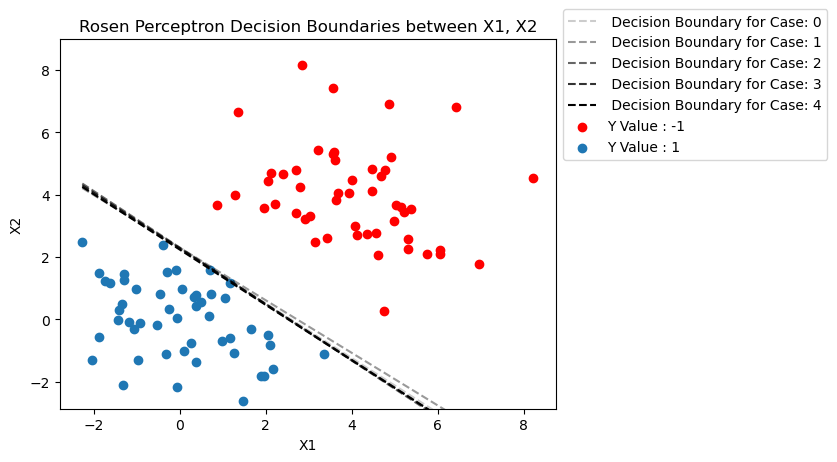

In [40]:
#Loading the Dataset from the file 
Dataset2 = pd.read_csv('sim_data.csv', index_col=0)
x_min = Dataset2['X1'].min()
x_max= Dataset2['X1'].max()
x = np.linspace(x_min,x_max,1000)
alpha_regulator = 0  #Variable for controlling line opacity
#Calculating and plotting the 5 Boundaries 

for i in range(5):
    intercept, coef = rosen_perceptron(Dataset2[['Y']],Dataset2[['X1', 'X2']])
    Rosen_Bound =(-intercept-x*coef[0])/coef[1]
    alpha_regulator = alpha_regulator +0.2
    plt.plot(x,Rosen_Bound,'--',c = "black", alpha = alpha_regulator, label=f' Decision Boundary for Case: {i}', lw =1.5)

#Plotting the points
df_temp = Dataset2[Dataset2['Y'] == -1]
plt.scatter(df_temp['X1'], df_temp['X2'],c='red',label='Y Value : -1')
df_temp = Dataset2[Dataset2['Y'] == 1]
plt.scatter(df_temp['X1'], df_temp['X2'],label='Y Value : 1' )

y_min = Dataset2['X2'].min()*1.1
y_max = Dataset2['X2'].max()*1.1
plt.ylim(y_min,y_max)
plt.legend(bbox_to_anchor=(1, 1.1), loc='upper left');
plt.title("Rosen Perceptron Decision Boundaries between X1, X2")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()


### b) Complete the code for LogisticRegression via Gradient Descent

In [4]:
#define the sigmoid function
def sigmoid(value):
    return expit(value)

In [17]:
#this function fits Logistic Regression using Gradient Descent
#inputs are
#y:         target labels (0,1)
#features:  input feature matrix
#eps:       tolerance for the stopping criterion
#rho:       step size in gradient descent

#this function returns the beta coefficients for a LogisticRegression model
#the first entry (betas[0] is the intercept)
def fit_LogReg_GRAD(y, features, eps=0.00000000001, rho=0.01):
    #sample size
    N = features.shape[0]
    #feature dim
    p = features.shape[1] + 1
    #initalize beta with 0s
    betas = np.zeros(p)

    #add column of 1 to X
    X = np.c_[np.ones(N),features]
    #compute predictions for class 1
    prob1 = sigmoid( X @ betas)
    #compute predictions for class 2
    prob0 = 1.0 - prob1

    old_cost = 100000000
    #compute the cost (J) of the current solution
    #COMPLETE THIS LINE
    cost = (-1/N) * np.sum(y * np.log(prob1) + (1 - y) * np.log(prob0))
    #as long as the there is a differentce between old and new cost that is larger
    #than the tolerance we update the parameters
    while np.abs(old_cost - cost) > eps:
        #beta update (one step of the gradient descent)
        #COMPLETE THIS LINE
        betas =betas - rho * X.T @ (prob1 - y)

        #update probabilities
        prob1 = sigmoid( X @ betas)
        prob0 = 1.0 - prob1
        
        #deal with 'underflow'
        prob1[prob1 == 0] = 0.000001
        prob0[prob0 == 0] = 0.000001

        old_cost = cost
        #recompute cost
        #COMPLETE THIS LINE
        cost = (-1/N) * np.sum(y * np.log(prob1) + (1 - y) * np.log(prob0))

        #reduce learning rate in case the cost increased
        if cost > old_cost:
          rho /= 2
    
    return(betas)

### c) Complete the code for HingeLoss with L2 regularization using Gradient Descent

In [18]:
#this function fits a linear classifier with Hinge Loss and L2 regularization using Gradient Descent
#inputs are
#y:         target labels (0,1)
#features:  input feature matrix
#lam:       the regularization parameter \lambda
#eps:       tolerance for the stopping criterion
#rho:     step size in gradient descent
#max_iter:  maximum number of iterations the algorithm is run

#this function returns the beta coefficients for a HingeL2 linear model
#the first entry (betas[0] is the intercept)

def fit_HingeL2_GRAD(y, features, lam=1, eps=0.00000000001, rho=0.01, max_iter=1000):
    #sample size
    N = features.shape[0]
    #feature dim
    p = features.shape[1] + 1
    #initalize beta random values  
    betas = np.random.normal(size=p)

    #add column of 1 to X
    X = np.c_[np.ones(N),features]
    #prediction, using a linear model
    yhat = X @ betas
  
    #initialize old_cost with a very high value
    old_cost = 100000000
    #compute the cost (J) of the current solution
    #COMPLETE THIS 
    cost = np.mean(np.maximum(0, 1 - y * yhat)) + lam * np.linalg.norm(betas)**2
      
    epoch=0
    while epoch < max_iter and np.abs(old_cost - cost) > eps:
        epoch += 1
        #beta update (one step of the gradient descent)
        #COMPLETE THIS 
        betas -= rho * (-2 * np.dot((y * np.maximum(0, 1 - y * yhat)), X) + 2 * lam * betas)

        #update prediction
        yhat = X @ betas    
        
        old_cost = cost
        #recompute cost
        #COMPLETE THIS (same as above)        
        cost = np.mean(np.maximum(0, 1 - y * yhat)) + lam * np.linalg.norm(betas)**2

        #reduce learning rate in case the cost increased
        if cost > old_cost:
          rho /= 2
    return(betas)

## Exercise 3: Suggest improvements to the ML pipeline

1. Using Ridge Regression on the entire dataset: Training and testing on the same dataset can lead to overfitting, where the model performs well on the training set but poorly on new, unseen data. This can result in overly optimistic performance estimates. RA should have split the dataset into separate training and testing sets, or used cross-validation to evaluate the model's performance on unseen data.

2. Using correlation as the evaluation metric: Correlation is not a suitable evaluation metric for classification tasks. It measures the linear relationship between two continuous variables and is not sensitive to the correct classification of individual samples. Instead, RA should have used a metric such as accuracy, precision, recall, or F1-score to evaluate the model's performance on the testing set.

3. Imbalanced dataset: The dataset has a class imbalance, with 63 samples from one class and 104 from the other. This can bias the model towards the majority class and result in poor performance on the minority class. RA should have addressed this issue by either oversampling the minority class, undersampling the majority class, or using a class-weighted loss function during training.

4. Lack of external validation: RA only evaluated the model's performance on the same dataset used for training. This does not provide any evidence of the model's generalizability to new, unseen data. RA should have validated the model's performance on an external dataset to ensure its usefulness in a clinical setting.



## Exercise 4: Vessel Segmentation

In [7]:
import imageio
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn import ensemble
from sklearn import svm
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.feature_extraction import image
from skimage.filters import scharr
from skimage.color import rgb2gray


In [5]:
train_path = ''
vali_path = ''
test_path = ''

In [ ]:





#this function takes an input image and
#does the manual feature extraction
#color image? grayscale? just one channel? apply any filters?
#if the variable nchan is sset to True, then the return is just the number of channels

def preprocess_img(img, nchan=False):
    #some examples for pre-processing:

    ##E.g., do nothing
    ##copy all three channels
    #res = img

    ##use just the green channel
    #res = img[:,:,1]  

    ##single channel gray    
    res = rgb2gray(img) * 255

    #add some edge filter applied to the gray-scale image
    res = np.dstack((res, scharr(rgb2gray(img)) * 255))
    
    #if nchan is True, then just return the number of channels
    #the pre-processing produces
    if nchan:
        try:
            return(res.shape[2])
        except IndexError:
            return(1)
    return (res)

In [8]:
#turn the images into a training dataset

#train_path:    path to the training data
#n_train_patch: number of patches to be extracted per image
#ps :           patch size as integer (e.g., 9 -> 9x9 patches)
#chan:          number of 'channels' the pre_processed image will have
#verbose:       if True, print some updates on the processing

def create_training_set(train_path, n_train_patch, ps, chan, verbose=True):
  if verbose:
    print("Extracting " + str(n_train_patch) + " pataches of size " + str(ps) + "x" + str(ps) + " from each image.")

  #dimension of square patch
  patch_dim = (ps, ps)
  #center of the patch
  patch_cnt = int((ps-1)/2)
  #dimension of the 'flattened' patch  (i.e., a single vector)  
  flat_dim = ps*ps*chan

  #initialize Y and X
  Y = []
  X = np.empty((0,flat_dim))

  for s in np.arange(80):
    if verbose:
      print("Extracting data from subject: " + str(s))
    tmp =     train_path + 'images/' + str(s) + '.png'
    tmp_msk = train_path + 'masks/' + str(s) + '.png'
    
    img_m = imageio.imread(tmp)
    msk_x = imageio.imread(tmp_msk)
    #binarize the mask
    msk = (msk_x > 0) * 1

    #extract features (using the function defined above)
    frames = preprocess_img(img_m)

    #add the labels as an additional channel
    frames = np.dstack((frames, msk))

    #sample patches    
    patch = image.extract_patches_2d(frames, patch_dim, max_patches=n_train_patch)
    
    #each patch receives the label of the center value in the 'label' channel
    Y_tmp = patch[:,patch_cnt,patch_cnt,chan] == 1

    #turn patches into a matrix where each row corresponds to all the features
    #of one patch
    X_tmp = np.reshape(patch[:,:,:,0:chan],(n_train_patch,flat_dim))
    
    #concatenate with Y and X
    Y.extend(Y_tmp)
    X = np.concatenate((X, X_tmp), axis=0)
  return (Y, X)

In [ ]:
#that is a bit clunky to get the channel size
im = imageio.imread(train_path + 'images/0.png')
chan = preprocess_img(im, True)

In [ ]:
#show the input image
plt.imshow(im)

### code for parts a) - f)